# Damas





## Objetivo

O objetivo do jogo é capturar todas as peças inimigas ou posicionar uma peça do outro lado do tabuleiro primeiro que seu adversário.

# Tabuleiro

É possível aumentar ou diminuir o tabuleiro, o jogo não será invalidado por conta disso, já que é só aumentar ou diminuir o número de peças. 

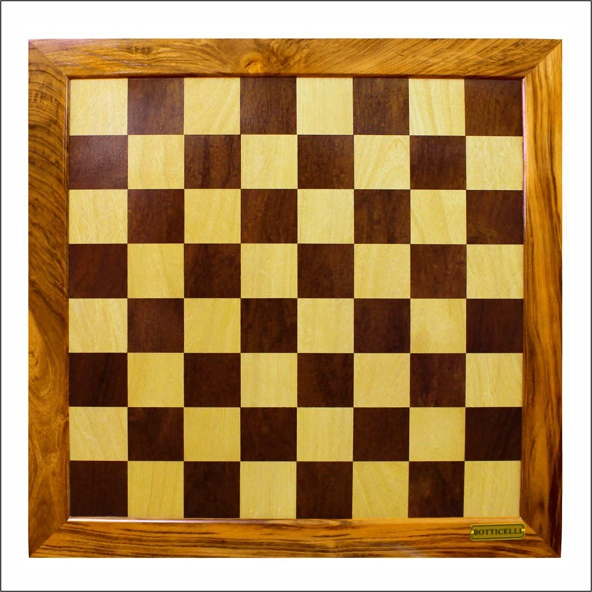

## Regras

# Condição de Movimentação

Cada peça pode se movimentar para a casa seguinte na diagonal.

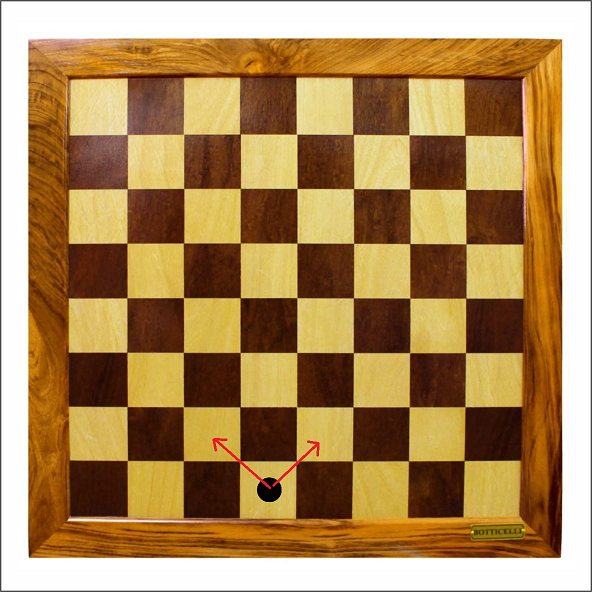

Se uma peça adversária está na diagonal, pode-se capturá-la, desde que na diagonal da frente da peça adversária não haja nenhuma peça.

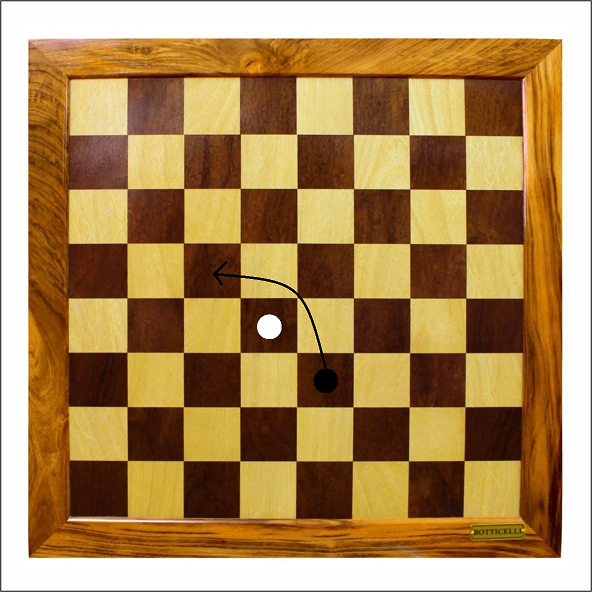

##Condição de Vitória

Peça preta atingiu a primeira linha do adversário.

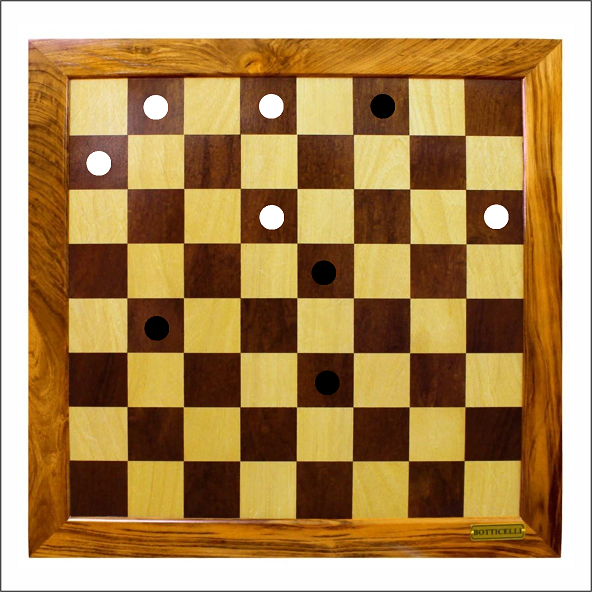

Todas as peças adversárias foram capturadas.

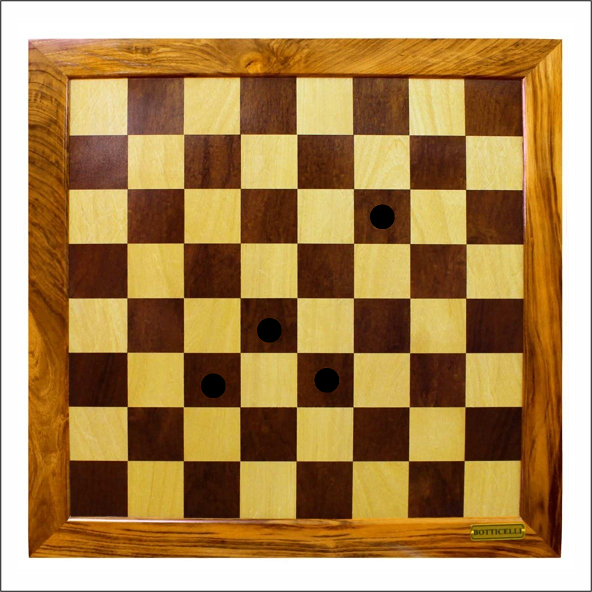

### Desenhando Tabuleiro

In [ ]:
from PIL import Image, ImageDraw

class Tabuleiro:

  #codigo das pecas
  peca1 = 1
  peca2 = -1
  tabuleiroVazio = 0

  turn = peca1
  
  # Numero de linhas e colunas
  linhasColunas = 0

  # Tamanho
  tamanho = 0
  tamanhoBorda = 0
  tamanhoBordaPeca = 0 #borda de cada peça

  #definição de cores
  corQuadrado1 = 'black' 
  corQuadrado2 = 'white'
  corPeca1 = 'white' # peça que ficará sob o quadrado 1
  corPeca2 = 'black' # peça que ficará sob o quadrado 2
  corBorda = 'white' 
  corBordaPeca = 'blue' 

  knowledge = {} #guarda o conhecimento de cada jogada


  # Guarda o tabuleiro em imagem
  drawTabuleiro = None

  # Guarda as tuplas do jogo
  tabuleiro = ()

  # Metodo construtor guardando as linhas e colunas
  def __init__(self,
    tamanho,
    corQuadrado1 = 'black',
    corQuadrado2 = 'white',
    corPeca1 = 'white',
    corPeca2 = 'black',
    corBorda = 'white',
    corBordaPeca = 'blue',
    tamanhoBorda = 0, 
    tamanhoBordaPeca = 10, 
  ):


    self.tamanho = tamanho
    self.tamanhoBordaPeca = tamanhoBordaPeca
    self.tamanhoBorda = tamanhoBorda 
    self.corBorda = corBorda 
    self.corBordaPeca = corBordaPeca 
    self.corQuadrado1 = corQuadrado1
    self.corQuadrado2 = corQuadrado2
    self.corPeca1 = corPeca1
    self.corPeca2 = corPeca2




  # verifica se o quadrado pode receber a peça
  def posicaoValida(self,index,tabuleiro): 
    operador1 = (index // self.linhasColunas) % 2 == 0
    operador2 = index % 2 == 0

    if (operador1 and not operador2) or (operador2 and not operador1):
      return True
    else:
      return False




  # verifica se acabou o jogo
  def winner(self,tab):
    quantidadePeca1 = 0
    quantidadePeca2 = 0    
    
    tamanho = len(tab)

    for i,k in enumerate(tab):
      
      
      # se for uma peca 1
      if k == self.peca1:
        quantidadePeca1 += 1
        
      # se for uma peça 2
      if k == self.peca2:
        quantidadePeca2 += 1

      # se houver uma peça 2 no linha 1, acabou o jogo
      if k == self.peca2 and i < self.linhasColunas:        
        return self.peca2
        

      # se houver uma peça 1 no linha 2, acabou o jogo
      if k == self.peca1 and i >= tamanho- self.linhasColunas:
        return self.peca1

    # se não houver peça 1 acaba o jogo
    if quantidadePeca1 == 0:
      return self.peca2

    # se não houver peça 2 acaba o jogo
    if quantidadePeca2 == 0:
      return self.peca1

    return False



  
  # gerar o tabuleior inicial do jogo
  def gerarTabuleiroInicial(self,tamanho):
    elementos = []
    self.setTamanhoTabuleiro(tamanho)
    for i in range(tamanho):

      valor = self.tabuleiroVazio

      #gera as peças 1 da parte superior
      if (self.posicaoValida(i,tabuleiro)) and i < 3*self.linhasColunas:
        valor = self.peca1

      #gera as peças 2 da parte inferior
      if (self.posicaoValida(i,tabuleiro)) and i >= tamanho-(3*self.linhasColunas):
        valor = self.peca2

      elementos.append(valor)    

    return elementos


  # verifica se a jogda é valida
  def jogadaValida(self,de,para):
    # calculo da linha em que esta
    linhaDe = de // self.linhasColunas
    linhaPara = para // self.linhasColunas

    valids = False  

    posicaoMedia = 0 

    # verifica se é um quadrado valido
    if self.posicaoValida(para,self.tabuleiro):
      valids = True;
    
    # se a posicação é valida e a peça for do tipo 1
    if valids and self.turn == self.peca1:
      # verifica os quadrantes da frente estão validos
      valids = ((de + self.linhasColunas + 1) == para or (de + self.linhasColunas - 1) == para) and self.tabuleiro[para] == self.tabuleiroVazio

      qtdLinhasPuladas = linhaPara - linhaDe
      posicaoMedia = (de + para)//2

      # verifica se a peça para pular, pode ser comida
      if qtdLinhasPuladas == 2 and self.tabuleiro[posicaoMedia] == self.peca2 and self.tabuleiro[para] == self.tabuleiroVazio and ((de + (self.linhasColunas*2) + 2) == para or (de + (self.linhasColunas*2) - 2) == para) and self.posicaoValida(para,self.tabuleiro):
        valids = True

      # caso pule duas linhas e não atender os requisitos, é inválida
      elif valids and qtdLinhasPuladas >= 2:
        valids = False


    # verifica se a peça é do tipo 2
    elif valids and self.turn == self.peca2:

      # verifica os quadrantes da frente estão validos
      valids = ((de - self.linhasColunas - 1) == para or (de - self.linhasColunas + 1) == para) and self.tabuleiro[para] == self.tabuleiroVazio

      qtdLinhasPuladas = linhaDe - linhaPara  
      posicaoMedia = (de + para)//2

      # verifica se a peça para pular, pode ser comida
      if qtdLinhasPuladas == 2 and self.tabuleiro[posicaoMedia] == self.peca1 and self.tabuleiro[para] == self.tabuleiroVazio and ((de - (self.linhasColunas*2) - 2) == para or (de - (self.linhasColunas*2) + 2) == para) and self.posicaoValida(para,self.tabuleiro):

        valids = True

      # caso pule duas linhas e não atender os requisitos, é inválida
      elif valids and qtdLinhasPuladas >= 2:
        valids = False

    
    
    return valids

  #faz a função de comer a peça
  def comer(self,de,para,tabuleiro = False):

    tab = [];

    if tabuleiro:
      tab = list(tabuleiro)


    # calculo da linha em que esta
    linhaPara = para // self.linhasColunas
    linhaDe = de // self.linhasColunas

    posicaoMedia = (de + para)//2

    # se a  peça for do tipo 1
    if self.turn == self.peca1:
      qtdLinhasPuladas = linhaPara - linhaDe

      # verifica se a peça para pular, pode ser comida
      if qtdLinhasPuladas == 2 and self.tabuleiro[posicaoMedia] == self.peca2:
        tab[de] = self.tabuleiroVazio
        tab[posicaoMedia] = self.tabuleiroVazio
        tab[para] = self.peca1

    # verifica se a peça é do tipo 2
    elif self.turn == self.peca2:
      qtdLinhasPuladas = linhaDe - linhaPara 

      # verifica se a peça para pular, pode ser comida
      if qtdLinhasPuladas == 2 and self.tabuleiro[posicaoMedia] == self.peca1:
        tab[de] = self.tabuleiroVazio
        tab[posicaoMedia] = self.tabuleiroVazio
        tab[para] = self.peca2
      

      return True,tab

   
    return False,tab



  # traz as jogas validas atraves do dicionario
  def get_valid_moves(self,turn,tabuleiro): 
    #atualiza os campos para consulta 
    self.tabuleiro = tabuleiro
    self.turn = turn

    # cria o dicionario de pecas
    pecas = {}

    #faz o for para varrer todas as peças
    for i,k1 in enumerate(self.tabuleiro):
      validas = []

      #se o turn for igual do elemento varra
      if k1 == self.turn:
        for j,k2 in enumerate(self.tabuleiro):
          if self.jogadaValida(i,j) and i != j:
            validas.append(j)
            
      # adiciona ao dicionario somente se houver elementos
      if len(validas) > 0:
        pecas[(i)] = validas


    return pecas   


  def tabuleiroJogada(self,origem,destino,valid_moves,turn,tab):
    if not (origem in valid_moves.keys() and destino in valid_moves[origem]):
      return False

    self.turn = turn

    jogo = list(tab)

    jogo[origem] = self.tabuleiroVazio
    jogo[destino] = turn

    comeu,jogo = tabuleiro.comer(origem,destino,jogo)
    return tuple(jogo)




  # executa as regras do jogo
  def jogada(self,origem,destino,valid_moves,turn,tab):    
    jogo = self.tabuleiroJogada(self,origem,destino,valid_moves,turn,tab)
    self.tabuleiro = list(jogo)
    
    return jogo


  # faz a jogada para os humanos
  def humanPlayer(self,turn,tab,knowledge = {}):
    valid_moves = tabuleiro.get_valid_moves(turn,tab)
    print("Jogadas válidas: ")
    print(valid_moves)

    origem, destino = eval(input("Jogue no formato 'origem, destino' "))
    jogo = self.jogada(origem, destino,valid_moves,turn,tab)
    while not (jogo):
      origem, destino = eval(input("JOGADA INVÁLIDA! Jogue no formato 'origem, destino' "))
      jogo = self.jogada(origem, destino,valid_moves,turn,tab)
    
    return jogo



  # faz a jogada do bot
  def bot(self,turn,tab,knowledge = {}):
    valid_moves = tabuleiro.get_valid_moves(turn,tab)
    jogadasPossiveis = []
    melhorJogada = {"tab":(),"pontuacao":-2} # nunca é possível -2, por isso, na primeira passada de laço, deve já ser salva

    # verifica as jogas válidas para fazer ao acaso
    if valid_moves:
      for origem in valid_moves:
        for destino in valid_moves[origem]:
          jogadasPossiveis.append(tuple(self.tabuleiroJogada(origem,destino,valid_moves,turn,tab)))
        

      for i in jogadasPossiveis:        
        if i in knowledge:
          know = knowledge[i]
          if turn == self.peca1:    
            calculo = (know[self.peca1] - know[self.peca2])/(know[self.peca1] + know[self.peca2] + know[self.tabuleiroVazio])  
          else:
            calculo = (know[self.peca2] - know[self.peca1])/(know[self.peca1] + know[self.peca2] + know[self.tabuleiroVazio])
          
          if calculo >= melhorJogada['pontuacao'] :
            melhorJogada['pontuacao'] = calculo
            melhorJogada['tab'] = list(i)

      if melhorJogada['tab'] == () or melhorJogada['tab'] == None:
        jogo = random.choice(list(jogadasPossiveis))
      else:
        jogo = list(melhorJogada['tab'])
      

      return jogo



  # faz a raiz quadrada para saber o tamanho do jogo
  def setTamanhoTabuleiro(self,tabuleiro):       
    self.linhasColunas = int(tabuleiro ** (0.5))

  



  # Retorna o tamanho do quadrado a ser usado
  def calcularTamanhoDesenhar(self,index):
    quadrado = (self.tamanho / self.linhasColunas) - (self.tamanhoBorda / self.linhasColunas)   

    xIndex = index // self.linhasColunas
    yIndex = index % self.linhasColunas

    y1 = ((xIndex) * (quadrado)) + (self.tamanhoBorda // 2)
    x1 = ((yIndex) * (quadrado)) + (self.tamanhoBorda // 2)
    y2 = ((xIndex + 1) * (quadrado)) + (self.tamanhoBorda // 2)
    x2 = ((yIndex + 1) * (quadrado)) + (self.tamanhoBorda // 2)

    return (x1,y1,x2,y2)


  



  # Desenha o quadradinho do tabuleiro
  def desenharQuadrado(self,index):
    operador1 = (index // self.linhasColunas) % 2 == 0
    operador2 = index % 2 == 0

    if self.linhasColunas % 2 == 1:
      cor = self.corQuadrado1 if operador2  else self.corQuadrado2
    else:
      cor = self.corQuadrado2 if (operador1 and not operador2) or (operador2 and not operador1)  else self.corQuadrado1

      

    posicao = self.calcularTamanhoDesenhar(index)

    return ImageDraw.Draw(self.drawTabuleiro).rectangle(posicao,fill=cor)


  # Desenha a pecinha do tabuleiro(circulo)
  def desenharPeca(self,index,peca):
    posicao = self.calcularTamanhoDesenhar(index)

    if peca == self.peca1:
      cor = self.corPeca1      
    elif peca == self.peca2:
      cor = self.corPeca2
    else:
      return None

    return ImageDraw.Draw(self.drawTabuleiro).ellipse(posicao,fill=cor,outline=self.corBordaPeca,width=self.tamanhoBordaPeca)

  # Gera o Canvas do tabuleiro
  def desenharTabuleiro(self,tabuleiro):
    # faz a raiz quadrada para saber o tamanho do jogo
    self.setTamanhoTabuleiro(len(tabuleiro))
    self.tabuleiro = tabuleiro

    self.drawTabuleiro = Image.new('RGB', (self.tamanho, self.tamanho),self.corBorda)
    board = ImageDraw.Draw(self.drawTabuleiro)

    # Faz o loop do quadrado e peça 1
    for i, e in enumerate(self.tabuleiro):
      self.desenharQuadrado(i)

      if e != 0:
        self.desenharPeca(i,e)

    return self.drawTabuleiro  


 



## O jogo

Um exemplo de instanciação:


In [ ]:
import random
from ipywidgets import interact

historicoTabuleiros = []

tabuleiro = Tabuleiro(
  tamanho = 600, 
  corQuadrado1 = 'white',
  corQuadrado2 = 'black',
  corPeca1 = 'white',
  corPeca2 = 'brown' ,
  corBorda = 'orange',
  corBordaPeca = 'gray',
  tamanhoBorda = 60,
  tamanhoBordaPeca = 6
)

jogo = tabuleiro.gerarTabuleiroInicial(100)
desenho = tabuleiro.desenharTabuleiro(jogo)
historicoTabuleiros.append(desenho)



def display_sequence(images) :
    def _show(frame=(0, len(images)-1)) :
        return images[frame]
    return interact(_show)


def damas(player1, player2, tab = tabuleiro.gerarTabuleiroInicial(100), printar = True,knowledgePeca1 = {},knowledgePeca2 = {}):
  turn = 1
  jogo = tuple(tab)
  historico = list()

  while not tabuleiro.winner(jogo):
    if printar:
      drawTabuleiro = tabuleiro.desenharTabuleiro(jogo)
      historicoTabuleiros.append(drawTabuleiro)  
      display(drawTabuleiro) 

    jogo = player1(tabuleiro.peca1,jogo,knowledge = knowledgePeca1)
    historico.append(tuple(jogo))

    if printar:
      drawTabuleiro = tabuleiro.desenharTabuleiro(jogo)
      historicoTabuleiros.append(drawTabuleiro)  
      display(drawTabuleiro)

    jogo = player2(tabuleiro.peca2,jogo,knowledge = knowledgePeca2)
    historico.append(tuple(jogo))
    
    

  if printar:
    drawTabuleiro = tabuleiro.desenharTabuleiro(jogo)  
    historicoTabuleiros.append(drawTabuleiro)  
    display(drawTabuleiro) 

  return tabuleiro.winner(jogo),jogo,historico




def campeonato_treino_knowledge(player1, player2, num_games = 1000,knowledge = {}) :
  results = [0,0,0]
  for i in range(num_games) :
    vitoria,jogo,historicoPartidas = damas(player1, player2,printar = False,knowledgePeca1 = knowledge,knowledgePeca2 = knowledge)
    results[vitoria] += 1

    for i in historicoPartidas:
      if i in knowledge:
        knowledge[tuple(i)][vitoria] += 1
      else:        
        knowledge[tuple(i)] = [0,0,0]
        knowledge[tuple(i)][vitoria] += 1
  
  
  return tuple(results),knowledge


def campeonato(player1, player2, num_treino = 1, num_games = 1000) :
  resultadoK,knowledge = campeonato_treino_knowledge(player1, player2, num_treino)
  results = [0,0,0]
  for i in range(num_games) :
    vitoria,jogo,historicoPartidas = damas(player1, player2,printar = False,knowledgePeca2 = knowledge)
    results[vitoria] += 1
      
  return tuple(resultadoK),tuple(results),knowledge
  
resultadoKnowl, resultadoCampeonato, _  = campeonato(tabuleiro.bot, tabuleiro.bot, num_treino = 600, num_games = 10)

print("Resultado do knowleadge = "+str(resultadoKnowl)+" ; resultado do campeonato = "+str(resultadoCampeonato))

Resultado do knowleadge = (0, 600, 0) ; resultado do campeonato = (0, 6, 4)
